演習03-01

In [19]:
# ドライブ読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ee291cb2d540012430fd0926c05d2227e7750b55f28bc444b8da6d2741fa6ac6
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import sympy
import math

(1)の回答  regression散布図と傾きの表示

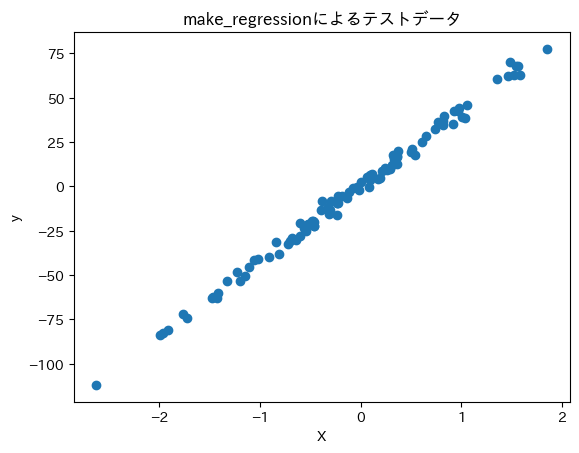

テストデータの傾きは41.7411003148779



In [14]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import japanize_matplotlib

X, y, coef = make_regression(random_state=42, n_samples=100, n_features=1, noise=3.0, bias=0.0, coef=True)

plt.title('make_regressionによるテストデータ')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X,y)
plt.show()
print(f'テストデータの傾きは{coef}\n')

(2)の回答  CSVファイルへの保存

In [23]:
import numpy as np
from sklearn.datasets import make_blobs,make_moons

# 確認用
# print(X)
# print(y)

# Xは100行1列、yは1行100列になっているので、yをreshapeする
# その後結合
data001 = np.concatenate([X, y.reshape(-1,1)], 1)

# 確認用
# print(data001)

# 保存する
np.savetxt('practice0301test2.csv', data001, header='X,y', comments='', delimiter=',')


(3)の回答 単回帰分析と傾き切片の表示

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/practice0301test2.csv')

# print(df1['X'])
# print(df1['y'])

# numpyへの変換必須
X1 = df1['X'].to_numpy().reshape(-1,1)
y1 = df1['y'].to_numpy().reshape(-1,1)

# 確認用
# print(X1)
# print(y1)

# 単回帰分析
model = LinearRegression()
model.fit(X1,y1)

# 表示
print(f'傾きは{model.coef_}')
print(f'切片は{model.intercept_}')

傾きは[[42.54992122]]
切片は[0.3495346]


(4)の回答 散布図と回帰直線の表示

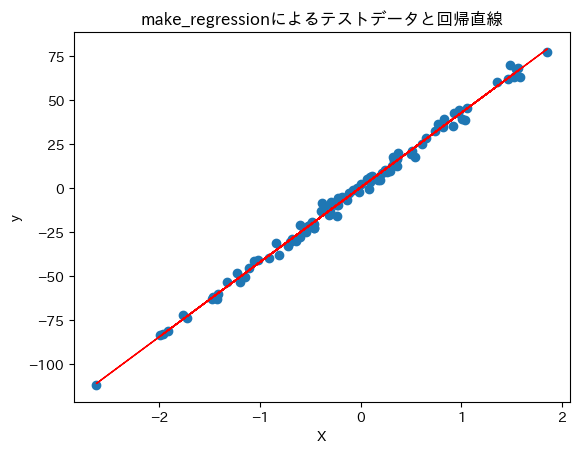

In [34]:

# 散布図
plt.title('make_regressionによるテストデータと回帰直線')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X,y)
# modelをフィット、プロット
y_lin = model.predict(X1)
plt.plot(X1,y_lin,c='r',linewidth='1.0')
plt.show()